In [1]:
import pandas as pd
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz

from pymc3 import *

%matplotlib inline

In [2]:
count_data = pd.read_csv('TAPR_Climate_FishCounts.csv')

In [3]:
zero_years = pd.DataFrame([[2011,0,1,1,0,0,"I","Luxilus cardinalis",0],[2012,0,1,1,0,0,"I","Luxilus cardinalis",0]],
                          columns=['Season','Normal','Flood_6Months','MultipleFloods_6Months','Drought_6Months','Flood_Drought_6Months','ToleranceCode','ScientificName','Freq'])
count_data = count_data.append(zero_years)
count_data.Flood_6Months = count_data.Flood_6Months - count_data.MultipleFloods_6Months

count_data

,Season,Normal,Flood_6Months,MultipleFloods_6Months,Drought_6Months,Flood_Drought_6Months,ToleranceCode,ScientificName,Freq
0,2001,1,0,0,0,0,I,Luxilus cardinalis,787
1,2001,1,0,0,0,0,I,Notropis percobromus,1
2,2001,1,0,0,0,0,I,Notropis topeka,7
3,2001,1,0,0,0,0,I,Notropis volucellus,1
4,2001,1,0,0,0,0,I,Pimephales tenellus,23
...,...,...,...,...,...,...,...,...,...
355,2019,0,0,1,0,0,T,Pimephales notatus,6
356,2019,0,0,1,0,0,T,Pimephales promelas,1
357,2019,0,0,1,0,0,T,Semotilus atromaculatus,75
0,2011,0,0,1,0,0,I,Luxilus cardinalis,0


In [4]:
years = count_data.Season.unique()
years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2011, 2012])

In [5]:
species_data = count_data.loc[:,['ScientificName','ToleranceCode']].groupby(['ScientificName']).agg(lambda x:x.value_counts().index[0])
species_data

,ToleranceCode
ScientificName,
Ameiurus melas,M
Ameiurus natalis,T
Campostoma anomalum,M
Catostomus commersonii,T
Cyprinella lutrensis,M
Cyprinidae spp.,U
Cyprinus carpio,T
Etheostoma nigrum,M
Etheostoma spectabile,M


In [6]:
count_data.loc[count_data.Season == 2007].iloc[0]

Season                                  2007
Normal                                     0
Flood_6Months                              1
MultipleFloods_6Months                     0
Drought_6Months                            0
Flood_Drought_6Months                      0
ToleranceCode                              I
ScientificName            Luxilus cardinalis
Freq                                     855
Name: 148, dtype: object

In [7]:
def generateZeroRow(year,species):
    sample = count_data.loc[count_data.Season == year].iloc[0]
    new_row = pd.DataFrame([[sample.Season,
                            sample.Normal,
                            sample.Flood_6Months,
                            sample.MultipleFloods_6Months,
                            sample.Drought_6Months,
                            sample.Flood_Drought_6Months,
                            species_data.loc[species].ToleranceCode,
                            species,
                            0]],
                          columns=['Season','Normal','Flood_6Months','MultipleFloods_6Months','Drought_6Months','Flood_Drought_6Months','ToleranceCode','ScientificName','Freq'])
    return new_row

generateZeroRow(2008,"Luxilus cornutus")
    
for year in years:
    for speciesName in species_data.index.values:
        year_data = count_data.loc[count_data.Season == year]
        if (len(year_data.loc[year_data.ScientificName == speciesName]) == 0):
            count_data = count_data.append(generateZeroRow(year,speciesName))

count_data

,Season,Normal,Flood_6Months,MultipleFloods_6Months,Drought_6Months,Flood_Drought_6Months,ToleranceCode,ScientificName,Freq
0,2001,1,0,0,0,0,I,Luxilus cardinalis,787
1,2001,1,0,0,0,0,I,Notropis percobromus,1
2,2001,1,0,0,0,0,I,Notropis topeka,7
3,2001,1,0,0,0,0,I,Notropis volucellus,1
4,2001,1,0,0,0,0,I,Pimephales tenellus,23
...,...,...,...,...,...,...,...,...,...
0,2012,0,0,1,0,0,M,Phenacobius mirabilis,0
0,2012,0,0,1,0,0,T,Pimephales notatus,0
0,2012,0,0,1,0,0,T,Pimephales promelas,0
0,2012,0,0,1,0,0,I,Pimephales tenellus,0


In [8]:
# This should be the number of rows in the above table.
len(years) * len(species_data.index.values)

760

In [9]:
count_data.loc[:, ['Freq','ToleranceCode']].groupby(['ToleranceCode']).count()

,Freq
ToleranceCode,
I,133
M,361
T,209
U,57


In [10]:
i_count_data = count_data.loc[count_data['ToleranceCode'] == "I"]
m_count_data = count_data.loc[count_data['ToleranceCode'] == "M"]
t_count_data = count_data.loc[count_data['ToleranceCode'] == "T"]
u_count_data = count_data.loc[count_data['ToleranceCode'] == "U"]

In [11]:
bin_count=50

Histogram of site counts of species Intolerant to poor water quality and human disturbance

<AxesSubplot:>

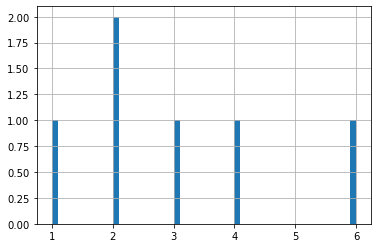

In [12]:
i_counts = u_count_data.groupby(['Season','ScientificName']).sum()
i_counts = i_counts = i_counts[i_counts.Freq != 0]
i_counts.Freq.hist(bins=bin_count)

<AxesSubplot:>

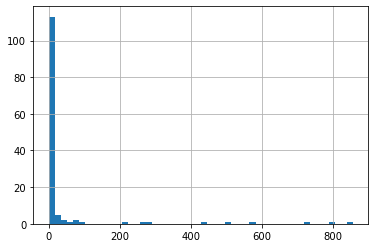

In [13]:
i_count_data.groupby(['Season','ScientificName']).sum().Freq.hist(bins=bin_count)

Histogram of site counts of species Moderately Tolerant to poor water quality and human disturbance

<AxesSubplot:>

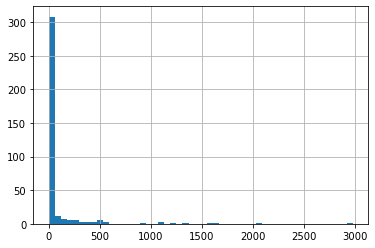

In [14]:
m_count_data.groupby(['Season','ScientificName']).sum().Freq.hist(bins=bin_count)

Histogram of site counts of species Tolerant to poor water quality and human disturbance

<AxesSubplot:>

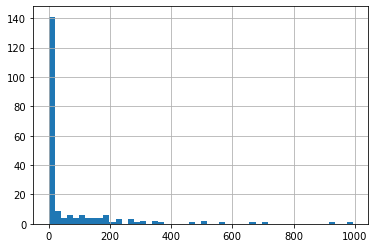

In [15]:
t_count_data.groupby(['Season','ScientificName']).sum().Freq.hist(bins=bin_count)

In [16]:
print(i_count_data.groupby(['Season','ScientificName']).sum().Freq.mean())
print(m_count_data.groupby(['Season','ScientificName']).sum().Freq.mean())
print(t_count_data.groupby(['Season','ScientificName']).sum().Freq.mean())


39.32330827067669
74.03324099722991
68.33492822966507


In [17]:
count_data

,Season,Normal,Flood_6Months,MultipleFloods_6Months,Drought_6Months,Flood_Drought_6Months,ToleranceCode,ScientificName,Freq
0,2001,1,0,0,0,0,I,Luxilus cardinalis,787
1,2001,1,0,0,0,0,I,Notropis percobromus,1
2,2001,1,0,0,0,0,I,Notropis topeka,7
3,2001,1,0,0,0,0,I,Notropis volucellus,1
4,2001,1,0,0,0,0,I,Pimephales tenellus,23
...,...,...,...,...,...,...,...,...,...
0,2012,0,0,1,0,0,M,Phenacobius mirabilis,0
0,2012,0,0,1,0,0,T,Pimephales notatus,0
0,2012,0,0,1,0,0,T,Pimephales promelas,0
0,2012,0,0,1,0,0,I,Pimephales tenellus,0


In [18]:
count_data.loc[count_data['Drought_6Months'] == 0].Freq.mean()

68.44375

I had trouble with an intermittent bug in the below code. Sometimes an error would occur, but if I reran it, or reran it after changing the first value in sample(___, cores=2)

In [19]:
def runModel(fish_data):
    with Model() as model:
        # Define priors
        sigma = HalfCauchy("sigma", beta=10, testval=1.0)
        intercept = Normal("Intercept", 0, sigma=20)
        multiflood_coeff = Normal("MultipleFloods_6Months", 0, sigma=20)

        # Define likelihood
        likelihood = Normal("y", mu=intercept + multiflood_coeff * fish_data.MultipleFloods_6Months,
                            sigma=sigma, observed=fish_data.Freq)

        trace = sample(150, cores=2)
        arviz.plot_trace(trace)
        print("Intercept", np.mean(trace['Intercept']))
        print("MultipleFloods_6Months", np.mean(trace['MultipleFloods_6Months']))
        print("MultipleFloods_6Months Normalized", (np.mean(trace['MultipleFloods_6Months'])/np.mean(trace['Intercept'])))
        

<ipython-input-19-1ef5f9763859>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = sample(150, cores=2)
Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MultipleFloods_6Months, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 150 draw iterations (2_000 + 300 draws total) took 11 seconds.


Intercept 60.59532186402903
MultipleFloods_6Months -24.280530610350137
MultipleFloods_6Months Normalized -0.4006997547572017


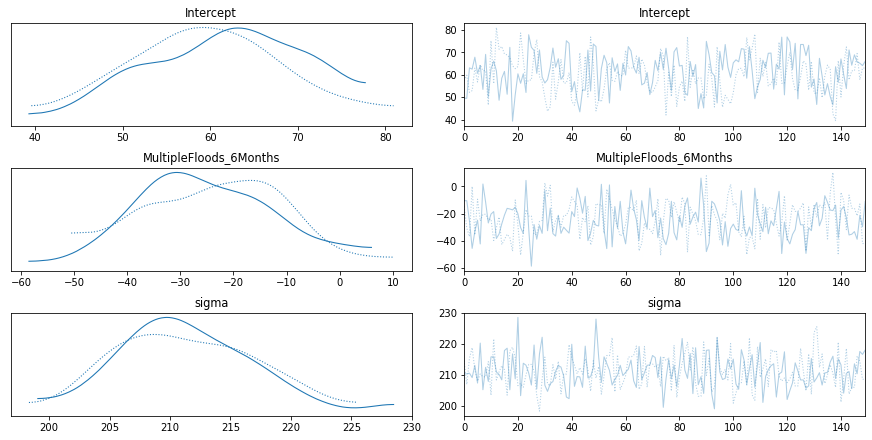

In [21]:
runModel(count_data)

<ipython-input-19-1ef5f9763859>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = sample(150, cores=2)
Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MultipleFloods_6Months, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 150 draw iterations (2_000 + 300 draws total) took 8 seconds.


Intercept 29.346236348270722
MultipleFloods_6Months -6.645365158235623
MultipleFloods_6Months Normalized -0.2264469310262068


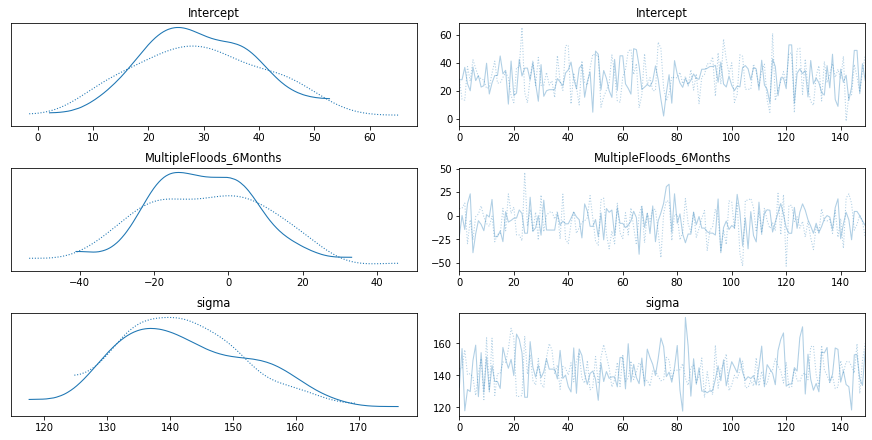

In [22]:
runModel(i_count_data)

<ipython-input-19-1ef5f9763859>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = sample(150, cores=2)
Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MultipleFloods_6Months, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 150 draw iterations (2_000 + 300 draws total) took 9 seconds.


Intercept 50.69453674687539
MultipleFloods_6Months -6.6060714374568485
MultipleFloods_6Months Normalized -0.13031130889787684


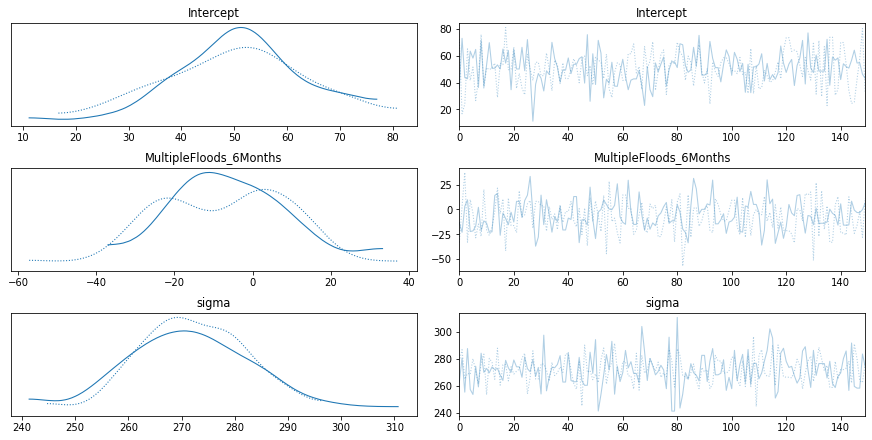

In [23]:
runModel(m_count_data)

<ipython-input-19-1ef5f9763859>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = sample(150, cores=2)
Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MultipleFloods_6Months, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 150 draw iterations (2_000 + 300 draws total) took 12 seconds.


Intercept 60.07130634521693
MultipleFloods_6Months -20.888191633606713
MultipleFloods_6Months Normalized -0.347723279290228


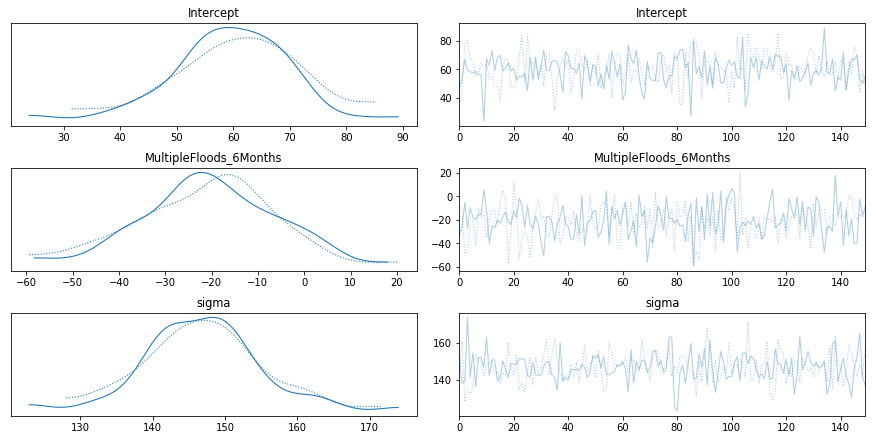

In [24]:
runModel(t_count_data)

<ipython-input-19-1ef5f9763859>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = sample(150, cores=2)
Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MultipleFloods_6Months, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 150 draw iterations (2_000 + 300 draws total) took 8 seconds.


Intercept 0.35082247612351725
MultipleFloods_6Months -0.10790332378076561
MultipleFloods_6Months Normalized -0.30757243655841227


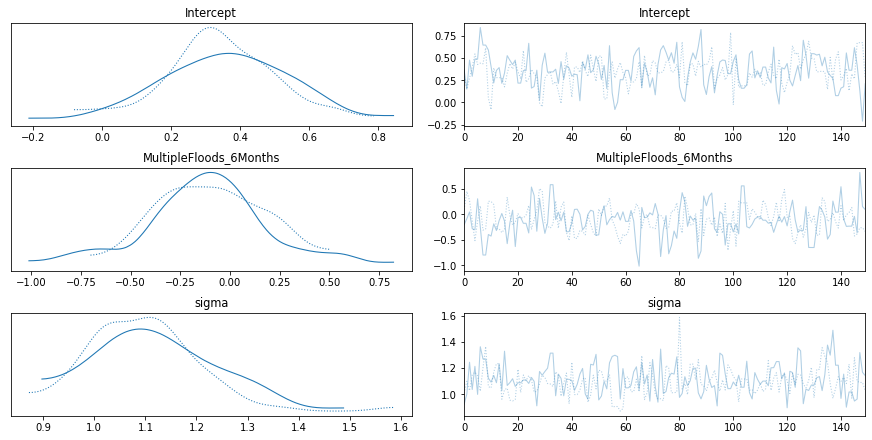

In [25]:
runModel(u_count_data)